In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
survey = pd.read_csv('../data/clean_survey_data.csv')


C:\Users\emily\AppData\Local\Temp\ipykernel_23196\1905035074.py:1: DtypeWarning: Columns (7,8,9,10,16,17,20,21,22,26,27,28,29,32,33,34,35,36,37,38,39,40,42,43,44,45,46,52,53,54,55,56,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  survey = pd.read_csv('../data/clean_survey_data.csv')


In [3]:
survey = survey[survey['Year']==2021]

In [4]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125911 entries, 0 to 125910
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   WPID_RANDOM             125911 non-null  int64  
 1   WP5                     125911 non-null  int64  
 2   Country                 125911 non-null  object 
 3   WGT                     125911 non-null  float64
 4   Year                    125911 non-null  int64  
 5   GlobalRegion            125911 non-null  int64  
 6   country.in.both.waves   125911 non-null  int64  
 7   CountryIncomeLevel2021  125911 non-null  object 
 8   CountryIncomeLevel2019  125911 non-null  object 
 9   PROJWT_2021             125911 non-null  object 
 10  PROJWT_2019             125911 non-null  object 
 11  Age                     125911 non-null  int64  
 12  AgeGroups4              125911 non-null  object 
 13  Gender                  125911 non-null  int64  
 14  Education               1

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
survey.head()

,WPID_RANDOM,WP5,Country,WGT,Year,GlobalRegion,country.in.both.waves,CountryIncomeLevel2021,CountryIncomeLevel2019,PROJWT_2021,PROJWT_2019,Age,AgeGroups4,Gender,Education,IncomeFeelings,INCOME_5,EMP_2010,Urbanicity,HouseholdSize,ChildrenInHousehold,Q1,Q2_1,Q3,Q4D,Q4F,Q5D,Q5F,Q6,Q10,Q11_1,Q11_2,Q10Q11Recode,Q13,Q14A,Q14B,Q14C,Q14D,Q14E,Q14F,Q14G,Q15,Q16A,Q16B,Q16C,Q16D,Q17,Q18_1,Q19A,Q19B,Q19C,Q19D,Q20,Q21,Q22A,Q22B,Q22C,Q22D,Q22E,resilience_index,Worried.Index,Experienced.Index,worry_exp_gap
0,174262180,1,United States,2.132627,2021,6,1,4,,562058.6277,,70,4,1,1,2,2,6,2,1,1,3,98,1,1,3,4,4,2,2,,2,6,1,1,2,2,1,2,1,2,98,2,1,1,2,2,,,,,,1,1,2,2,2,2,2,0.604166667,0.591526773,-0.004188948,0.595715721
1,115327451,1,United States,0.620385,2021,6,1,4,,163503.9201,,56,3,1,3,1,5,1,1,1,1,2,7,3,3,3,4,4,1,2,,2,6,1,1,2,1,2,2,1,1,6,2,1,1,1,2,,,,,,1,1,2,2,2,2,2,0.8125,0.302011196,-0.004188948,0.306200143
2,189972125,1,United States,0.610080,2021,6,1,4,,160787.9589,,67,4,2,2,2,4,6,1,1,1,2,3,3,2,3,4,4,1,2,,4,8,2,1,1,1,1,1,1,2,1,1,1,1,1,2,,,,,,1,1,2,2,2,2,2,0.645833333,0.409201775,-0.004188948,0.413390723
3,173358289,1,United States,0.490774,2021,6,1,4,,129344.4561,,76,4,2,2,4,2,6,2,1,1,2,3,1,2,3,4,2,1,2,,1,5,1,1,2,1,1,2,1,2,3,2,1,1,1,2,,,,,,1,2,2,2,2,2,2,0.604166667,0.114227334,0.313785914,-0.19955858
4,183251831,1,United States,1.910021,2021,6,1,4,,503390.2659,,62,3,2,3,1,5,1,2,1,1,3,10,2,3,3,4,2,1,2,,4,8,2,1,1,1,2,2,1,2,2,1,1,1,1,2,,,,,,1,1,2,2,2,2,2,0.895833333,0.228660806,0.441144416,-0.21248361


In [7]:
survey.CountryIncomeLevel2021.astype(str).value_counts()

CountryIncomeLevel2021
4    41673
2    38115
3    37122
1     8001
9     1000
Name: count, dtype: int64

In [8]:
dictionary = {'1': 'Low income', '2':'Lower-middle income', '3': 'Upper-middle income', '4': 'High income', '9': 'Not classified'}


In [9]:
survey['CountryIncomeLevel2021'].astype(str).map(dictionary).value_counts()

CountryIncomeLevel2021
High income            41673
Lower-middle income    38115
Upper-middle income    37122
Low income              8001
Not classified          1000
Name: count, dtype: int64

In [10]:
survey['CountryIncomeLevel2021'] = survey['CountryIncomeLevel2021'].astype(str).map(dictionary)

In [11]:
survey.CountryIncomeLevel2021.value_counts()

CountryIncomeLevel2021
High income            41673
Lower-middle income    38115
Upper-middle income    37122
Low income              8001
Not classified          1000
Name: count, dtype: int64

In [12]:
#transforming "Global Region" column
survey.GlobalRegion.astype(str).value_counts()

GlobalRegion
5     17535
13    15559
2     13001
14    12019
12    11025
9      9124
8      8518
11     8069
10     8004
1      7003
7      6004
3      4008
4      2027
6      2015
15     2000
Name: count, dtype: int64

In [13]:
GR_dict = {'1': 'Eastern Africa', 
         '2': 'Central/Western Africa', 
         '3': 'North Africa', 
         '4': 'Southern Africa', 
         '5': 'Latin America & Caribbean', 
         '6': 'Northern America', 
         '7': 'Central Asia', 
         '8': 'East Asia', 
         '9': 'South-eastern Asia', 
         '10': 'South Asia',
         '11': 'Middle East', 
         '12': 'Eastern Europe', 
         '13': 'Northern/Western Europe', 
         '14': 'Southern Europe',
         '15': 'Australia and New Zealand'  
        }

In [14]:
survey['GlobalRegion'] = survey['GlobalRegion'].astype(str).map(GR_dict)

In [15]:
survey.GlobalRegion.astype(str).value_counts()

GlobalRegion
Latin America & Caribbean    17535
Northern/Western Europe      15559
Central/Western Africa       13001
Southern Europe              12019
Eastern Europe               11025
South-eastern Asia            9124
East Asia                     8518
Middle East                   8069
South Asia                    8004
Eastern Africa                7003
Central Asia                  6004
North Africa                  4008
Southern Africa               2027
Northern America              2015
Australia and New Zealand     2000
Name: count, dtype: int64

In [16]:
#drop columns
survey = survey.drop(columns=['WP5', 'country.in.both.waves', 'CountryIncomeLevel2019', 'PROJWT_2019'])

In [17]:
survey.Age.astype(str).value_counts()

Age
30    4242
40    3887
25    3601
35    3526
20    3065
      ... 
94      18
95      17
96      10
98       4
97       1
Name: count, Length: 86, dtype: int64

In [18]:
survey.head()

,WPID_RANDOM,Country,WGT,Year,GlobalRegion,CountryIncomeLevel2021,PROJWT_2021,Age,AgeGroups4,Gender,Education,IncomeFeelings,INCOME_5,EMP_2010,Urbanicity,HouseholdSize,ChildrenInHousehold,Q1,Q2_1,Q3,Q4D,Q4F,Q5D,Q5F,Q6,Q10,Q11_1,Q11_2,Q10Q11Recode,Q13,Q14A,Q14B,Q14C,Q14D,Q14E,Q14F,Q14G,Q15,Q16A,Q16B,Q16C,Q16D,Q17,Q18_1,Q19A,Q19B,Q19C,Q19D,Q20,Q21,Q22A,Q22B,Q22C,Q22D,Q22E,resilience_index,Worried.Index,Experienced.Index,worry_exp_gap
0,174262180,United States,2.132627,2021,Northern America,High income,562058.6277,70,4,1,1,2,2,6,2,1,1,3,98,1,1,3,4,4,2,2,,2,6,1,1,2,2,1,2,1,2,98,2,1,1,2,2,,,,,,1,1,2,2,2,2,2,0.604166667,0.591526773,-0.004188948,0.595715721
1,115327451,United States,0.620385,2021,Northern America,High income,163503.9201,56,3,1,3,1,5,1,1,1,1,2,7,3,3,3,4,4,1,2,,2,6,1,1,2,1,2,2,1,1,6,2,1,1,1,2,,,,,,1,1,2,2,2,2,2,0.8125,0.302011196,-0.004188948,0.306200143
2,189972125,United States,0.610080,2021,Northern America,High income,160787.9589,67,4,2,2,2,4,6,1,1,1,2,3,3,2,3,4,4,1,2,,4,8,2,1,1,1,1,1,1,2,1,1,1,1,1,2,,,,,,1,1,2,2,2,2,2,0.645833333,0.409201775,-0.004188948,0.413390723
3,173358289,United States,0.490774,2021,Northern America,High income,129344.4561,76,4,2,2,4,2,6,2,1,1,2,3,1,2,3,4,2,1,2,,1,5,1,1,2,1,1,2,1,2,3,2,1,1,1,2,,,,,,1,2,2,2,2,2,2,0.604166667,0.114227334,0.313785914,-0.19955858
4,183251831,United States,1.910021,2021,Northern America,High income,503390.2659,62,3,2,3,1,5,1,2,1,1,3,10,2,3,3,4,2,1,2,,4,8,2,1,1,1,2,2,1,2,2,1,1,1,1,2,,,,,,1,1,2,2,2,2,2,0.895833333,0.228660806,0.441144416,-0.21248361


In [19]:
survey.Age.value_counts(dropna=False)

Age
30    4242
40    3887
25    3601
35    3526
20    3065
      ... 
94      18
95      17
96      10
98       4
97       1
Name: count, Length: 86, dtype: int64

In [20]:
age_category = []
for age in survey.Age: 
    if age < 99: 
        age_category.append(str(age))
    elif age==99: 
        (age_category.append('99+'))
    else: 
        age_category.append('Refused')

In [21]:
print (age_category)

['70', '56', '67', '76', '62', '54', '57', '75', '20', '72', '82', '81', '74', '78', '73', '71', '78', '73', '75', '33', '26', '78', '30', '74', '40', 'Refused', '63', '33', '60', '36', '38', '69', '63', '30', '53', '26', '62', '47', '76', '47', '45', '79', '76', '39', '64', '22', '33', '62', '24', '67', '53', '33', '80', '62', '61', '39', '69', '52', '46', '70', '43', '69', '48', 'Refused', '74', '73', '64', '61', '69', '62', '33', '57', '25', '69', '53', '76', '53', '47', '49', '71', '55', '33', '63', '50', '61', '51', '82', '59', '40', '36', '35', '50', '23', '59', '74', '65', '52', '75', '85', '54', 'Refused', '63', '55', '47', '59', '18', '80', '80', '54', '77', '77', '75', '23', '25', '56', '30', '81', '60', '55', 'Refused', '69', '70', '30', '56', '71', '30', '53', '46', '20', '75', '51', '23', '62', '52', 'Refused', '36', '22', '82', '63', '57', '68', '82', '22', '67', '43', '22', '54', '37', '55', '50', '30', '32', '56', '54', '61', '66', '65', '36', '62', '57', '34', '68', '2

In [22]:
survey ['age_modified'] = age_category

In [23]:
# age_dict = {'99': '99+', '100':'refused'}
# survey['Age'] = survey['Age'].astype(str).map(age_dict)

In [24]:
#nooooooo - all other values changed to nan
# survey.Age.astype(str).value_counts()

In [25]:
survey.AgeGroups4.astype(str).value_counts()

AgeGroups4
2    47661
1    36617
3    24681
4    16459
       493
Name: count, dtype: int64

In [26]:
#exploring blank values
survey[survey['AgeGroups4']== ' ']

,WPID_RANDOM,Country,WGT,Year,GlobalRegion,CountryIncomeLevel2021,PROJWT_2021,Age,AgeGroups4,Gender,Education,IncomeFeelings,INCOME_5,EMP_2010,Urbanicity,HouseholdSize,ChildrenInHousehold,Q1,Q2_1,Q3,Q4D,Q4F,Q5D,Q5F,Q6,Q10,Q11_1,Q11_2,Q10Q11Recode,Q13,Q14A,Q14B,Q14C,Q14D,Q14E,Q14F,Q14G,Q15,Q16A,Q16B,Q16C,Q16D,Q17,Q18_1,Q19A,Q19B,Q19C,Q19D,Q20,Q21,Q22A,Q22B,Q22C,Q22D,Q22E,resilience_index,Worried.Index,Experienced.Index,worry_exp_gap,age_modified
25,154527586,United States,0.454726,2021,Northern America,High income,119844.0561,100,,2,3,3,3,6,2,1,1,2,98,2,2,3,1,4,1,2,,4,8,1,1,1,1,1,1,1,1,1,2,1,2,2,2,,,,,,1,1,2,2,2,1,2,0.697916667,0.228660806,0.141893127,0.086767678,Refused
63,175717742,United States,1.835951,2021,Northern America,High income,483869.114,100,,1,2,2,5,4,1,1,7,2,11,2,3,3,4,4,1,2,,4,8,3,1,1,2,2,2,1,1,6,1,2,2,1,2,,,,,,1,2,2,2,2,2,2,0.625,0.228660806,0.141893127,0.086767678,Refused
100,112359482,United States,0.454791,2021,Northern America,High income,119861.1722,100,,1,2,1,4,6,1,1,1,3,5,1,2,3,4,2,1,2,,4,8,2,1,2,1,2,2,1,1,3,1,1,1,1,2,,,,,,3,1,1,1,2,2,1,0.770833333,0.302011196,0.313785914,-0.011774719,Refused
119,185043115,United States,3.342459,2021,Northern America,High income,880912.4328,100,,2,3,1,4,6,2,2,1,3,1,1,2,3,4,4,1,2,,4,8,1,1,1,1,2,2,1,2,3,1,1,1,1,1,2,1,1,1,2,1,1,2,2,2,2,2,0.916666667,0.114227334,-0.004188948,0.118416282,Refused
134,182244917,United States,0.999146,2021,Northern America,High income,263327.1853,100,,2,2,2,4,6,2,1,1,3,3,2,2,3,4,2,1,2,,4,8,3,1,1,1,2,2,1,1,1,2,2,2,2,2,,,,,,2,2,2,2,2,2,2,0.395833333,0.454954408,0.141893127,0.313061281,Refused
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122426,208563574,United Arab Emirates,0.433016,2021,Middle East,High income,3569.073085,100,,1,3,1,5,1,9,1,7,3,23,2,3,3,4,4,1,2,,4,8,2,2,2,1,2,1,2,1,9,1,1,1,1,2,,,,,,1,2,2,2,2,2,2,0.895833333,0.114227334,0.313785914,-0.19955858,Refused
122449,116489163,United Arab Emirates,1.290168,2021,Middle East,High income,10634.03059,100,,1,3,2,4,1,2,1,7,1,1,1,1,2,4,2,1,2,,3,7,2,2,1,1,2,2,2,1,3,1,1,1,1,1,7,2,2,2,2,3,2,2,2,2,2,2,0.6875,0.591526773,0.313785914,0.277740859,Refused
122473,130162268,United Arab Emirates,1.071155,2021,Middle East,High income,8828.846356,100,,2,9,6,3,6,2,3,7,98,23,98,3,3,4,98,1,99,,,99,98,98,98,98,98,98,98,98,,98,98,98,98,2,,,,,,98,98,2,2,2,2,2,,0.006116199,,,Refused
123938,160267849,Uzbekistan,1.047914,2021,Central Asia,Lower-middle income,25055.57252,100,,2,2,2,2,1,2,4,6,1,98,3,3,3,4,4,1,2,,4,8,1,1,1,1,1,1,1,1,6,1,1,1,1,2,,,,,,2,2,1,2,2,2,2,0.645833333,0.006116199,-0.004188948,0.010305147,Refused


In [27]:
AG4_dict = {'1': '15-29', 
            '2': '30-49', 
            '3': '50-64', 
            '4': '65+', 
            ' ': 'Refused'
           }

In [28]:
survey['AgeGroups4'] = survey['AgeGroups4'].astype(str).map(AG4_dict)

In [29]:
survey.AgeGroups4.astype(str).value_counts()

AgeGroups4
30-49      47661
15-29      36617
50-64      24681
65+        16459
Refused      493
Name: count, dtype: int64

In [30]:
survey.Gender.astype(str).value_counts()

Gender
2    66494
1    59417
Name: count, dtype: int64

In [31]:
gender_dict = {'1': 'Male', '2': 'Female'}
survey['Gender'] = survey['Gender'].astype(str).map(gender_dict)

In [32]:
survey.Gender.value_counts()

Gender
Female    66494
Male      59417
Name: count, dtype: int64

In [33]:
survey.Education.value_counts()

Education
2    63525
3    32151
1    29525
9      710
Name: count, dtype: int64

In [34]:
ed_dict = {'1': 'Primary (0-8 years)',
           '2': 'Secondary (9-15 years)', 
           '3': 'Tertiary (16 years or more)',
           '9': 'DK/Refused'
          }
survey['Education'] = survey['Education'].astype(str).map(ed_dict)

In [35]:
survey.Education.value_counts()

Education
Secondary (9-15 years)         63525
Tertiary (16 years or more)    32151
Primary (0-8 years)            29525
DK/Refused                       710
Name: count, dtype: int64

In [36]:
survey.IncomeFeelings.value_counts()

IncomeFeelings
2    48337
1    30444
3    26139
4    18978
5     1217
6      796
Name: count, dtype: int64

In [37]:
inc_fe_dict = {'1': 'Living comfortably', 
               '2': 'Getting by', 
               '3': 'Finding it difficult', 
               '4': 'Finding it very difficult', 
               '5': 'DK',
               '6': 'Refused'
              }
survey['IncomeFeelings'] = survey['IncomeFeelings'].astype(str).map(inc_fe_dict)

In [38]:
survey.IncomeFeelings.value_counts()

IncomeFeelings
Getting by                   48337
Living comfortably           30444
Finding it difficult         26139
Finding it very difficult    18978
DK                            1217
Refused                        796
Name: count, dtype: int64

In [39]:
survey.INCOME_5.astype(str).value_counts()

INCOME_5
5    32611
4    27127
3    24374
2    21791
1    20008
Name: count, dtype: int64

In [40]:
income5_dict = {'1': 'Poorest 20%',
                '2': 'Second 20%', 
                '3': 'Middle 20%', 
                '4': 'Fourth 20%', 
                '5': 'Richest 20%'
               }
survey['INCOME_5'] = survey['INCOME_5'].astype(str).map(income5_dict)

In [41]:
survey.INCOME_5.astype(str).value_counts()

INCOME_5
Richest 20%    32611
Fourth 20%     27127
Middle 20%     24374
Second 20%     21791
Poorest 20%    20008
Name: count, dtype: int64

In [42]:
survey.EMP_2010.astype(str).value_counts()

EMP_2010
6    40467
1    38263
2    17892
5     9957
3     8388
4     7444
      3500
Name: count, dtype: int64

In [43]:
#all the blank values for employment are in China (3500 values)
survey[(survey['EMP_2010']== ' ') | (survey['Country']=='China')]

,WPID_RANDOM,Country,WGT,Year,GlobalRegion,CountryIncomeLevel2021,PROJWT_2021,Age,AgeGroups4,Gender,Education,IncomeFeelings,INCOME_5,EMP_2010,Urbanicity,HouseholdSize,ChildrenInHousehold,Q1,Q2_1,Q3,Q4D,Q4F,Q5D,Q5F,Q6,Q10,Q11_1,Q11_2,Q10Q11Recode,Q13,Q14A,Q14B,Q14C,Q14D,Q14E,Q14F,Q14G,Q15,Q16A,Q16B,Q16C,Q16D,Q17,Q18_1,Q19A,Q19B,Q19C,Q19D,Q20,Q21,Q22A,Q22B,Q22C,Q22D,Q22E,resilience_index,Worried.Index,Experienced.Index,worry_exp_gap,age_modified
28168,136005062,China,0.967899,2021,East Asia,Upper-middle income,317708.3091,33,30-49,Male,Tertiary (16 years or more),Getting by,Richest 20%,,2,3,2,,,98,3,3,4,4,1,1,3,,3,3,,,,,,,,,,,,,2,,,,,,1,2,1,2,2,2,2,,0.114227334,-0.004188948,0.118416282,33
28169,210536145,China,2.387778,2021,East Asia,Upper-middle income,783777.1699,25,15-29,Male,Primary (0-8 years),Finding it difficult,Richest 20%,,2,1,1,,,2,3,3,4,4,1,2,,1,5,3,,,,,,,,,,,,,1,2,,,,,1,2,2,2,2,2,2,,0.228660806,-0.004188948,0.232849754,25
28170,184344371,China,0.136858,2021,East Asia,Upper-middle income,44922.97524,40,30-49,Female,Secondary (9-15 years),Living comfortably,Second 20%,,1,3,1,,,98,3,3,4,4,1,98,,,99,1,,,,,,,,,,,,,2,,,,,,1,2,2,2,2,2,2,,,-0.004188948,,40
28171,185403189,China,2.420897,2021,East Asia,Upper-middle income,794648.3389,59,50-64,Male,Primary (0-8 years),Getting by,Second 20%,,1,2,1,,,98,3,3,4,4,1,2,,4,8,1,,,,,,,,,,,,,2,,,,,,1,2,2,2,2,2,2,,0.006116199,-0.004188948,0.010305147,59
28172,137306489,China,0.167274,2021,East Asia,Upper-middle income,54906.99013,44,30-49,Male,Tertiary (16 years or more),Getting by,Middle 20%,,2,2,3,,,3,2,2,4,4,1,2,,3,7,2,,,,,,,,,,,,,2,,,,,,1,2,1,2,2,2,2,,,-0.004188948,,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31663,136186338,China,0.641413,2021,East Asia,Upper-middle income,210540.7102,21,15-29,Female,Tertiary (16 years or more),Getting by,Richest 20%,,2,1,1,,,1,1,3,4,4,1,2,,1,5,2,,,,,,,,,,,,,2,,,,,,1,2,1,2,2,2,2,,,-0.004188948,,21
31664,130582748,China,0.777694,2021,East Asia,Upper-middle income,255274.5494,35,30-49,Female,Primary (0-8 years),Getting by,Second 20%,,1,3,3,,,2,98,3,4,4,1,1,98,,4,1,,,,,,,,,,,,,2,,,,,,98,1,2,2,2,2,2,,,-0.004188948,,35
31665,119505255,China,0.641710,2021,East Asia,Upper-middle income,210638.1956,22,15-29,Female,Tertiary (16 years or more),Getting by,Fourth 20%,,2,1,1,,,2,1,3,4,4,1,1,1,,1,2,,,,,,,,,,,,,2,,,,,,1,1,2,2,2,2,2,,0.454954408,-0.004188948,0.459143356,22
31666,168053438,China,0.136858,2021,East Asia,Upper-middle income,44922.97524,17,15-29,Male,Secondary (9-15 years),Getting by,Richest 20%,,1,1,1,,,98,3,3,4,4,1,2,,1,5,2,,,,,,,,,,,,,1,1,,,,,2,98,2,2,2,2,1,,,-0.004188948,,17


In [44]:
emp_dict = {'1': 'Employed full time - employer', 
            '2': 'Employed full time - self', 
            '3': 'Employed part time do not want full time', 
            '4': 'Unemployed', 
            '5': 'Employed part time want full time', 
            '6': 'Out of workforce', 
            ' ': 'no response listed'
           }
survey['EMP_2010'] = survey['EMP_2010'].astype(str).map(emp_dict)

In [45]:
survey.EMP_2010.astype(str).value_counts()

EMP_2010
Out of workforce                            40467
Employed full time - employer               38263
Employed full time - self                   17892
Employed part time want full time            9957
Employed part time do not want full time     8388
Unemployed                                   7444
no response listed                           3500
Name: count, dtype: int64

In [46]:
survey.Urbanicity.astype(str).value_counts()

Urbanicity
1    68841
2    56808
9      262
Name: count, dtype: int64

In [47]:
urban_dict = {'1': 'Rural area/small town',
              '2': 'Large city/suburb', 
              '9': 'DK/Refused'
             }
survey['Urbanicity'] = survey['Urbanicity'].astype(str).map(urban_dict)

In [48]:
survey.Urbanicity.astype(str).value_counts()

Urbanicity
Rural area/small town    68841
Large city/suburb        56808
DK/Refused                 262
Name: count, dtype: int64

In [49]:
survey.HouseholdSize.astype(str).value_counts()

HouseholdSize
2    44048
1    43132
3    34099
4     4632
Name: count, dtype: int64

In [50]:
household_dict = {'1': '1-2 people',
                  '2': '3-4 people',
                  '3': '5-9 people',
                  '4': '10+ people'
                 }
survey['HouseholdSize'] = survey['HouseholdSize'].astype(str).map(household_dict)

In [51]:
survey.HouseholdSize.astype(str).value_counts()

HouseholdSize
3-4 people    44048
1-2 people    43132
5-9 people    34099
10+ people     4632
Name: count, dtype: int64

In [52]:
survey.ChildrenInHousehold.astype(str).value_counts()

ChildrenInHousehold
1    62613
2    22705
3    19975
4    10046
6     5423
5     4691
7      458
Name: count, dtype: int64

In [53]:
kids_dict = {'1': 'None',
             '2': 'One', 
             '3': 'Two',
             '4': 'Three',
             '5': 'Four',
             '6': 'Five or more', 
             '7': 'DK/Refused'
            }
survey['ChildrenInHousehold'] = survey['ChildrenInHousehold'].astype(str).map(kids_dict)

In [54]:
survey.ChildrenInHousehold.astype(str).value_counts()

ChildrenInHousehold
None            62613
One             22705
Two             19975
Three           10046
Five or more     5423
Four             4691
DK/Refused        458
Name: count, dtype: int64

In [55]:
#Q10Q11Recode has values for all rows, so using that instead of the other similar columns
survey.Q10Q11Recode.isnull().value_counts()

Q10Q11Recode
False    125911
Name: count, dtype: int64

In [56]:
#dropping similar columns to above that are unnecessary
survey = survey.drop(columns=['Q10', 'Q11_1', 'Q11_2'])

In [57]:
#changing column names for survey questions and others

survey.rename(columns = {'EMP_2010': 'employment',
                         'Q1': 'safety_comp', 
                         'Q2_1': 'greatest_risk',
                         'Q3': 'climate_change',
                         'Q4D': 'weather_worry', 
                         'Q4F': 'mental_health_worry', 
                         'Q5D': 'weather_harm',
                         'Q5F': 'mental_health_harm',
                         'Q6': 'internet_use_30days',
                         'Q10Q11Recode': 'income_loss', 
                         'Q13': 'neighbors_care', 
                         'Q14A': 'info_NWS', 
                         'Q14B': 'info_mgmt_agency',
                         'Q14C': 'info_news',
                         'Q14D': 'info_religious_leaders',
                         'Q14E': 'info_famous_person',
                         'Q14F': 'info_emrgncy_svcs',
                         'Q14G': 'info_internet',
                         'Q15': 'info__trust_most',
                         'Q16A': 'prep_natl_gov',
                         'Q16B': 'prep_hospitals', 
                         'Q16C': 'prep_fam',
                         'Q16D': 'prep_local_gov',
                         'Q17': 'disaster_exp',
                         'Q18_1': 'disaster_exp_type',
                         'Q19A': 'warning_internet',
                         'Q19B': 'warning_govpolice',
                         'Q19C': 'warning_media',
                         'Q19D': 'warning_comm_org',
                         'Q20': 'protect_future',
                         'Q21': 'plan_known',
                         'Q22A': 'no_electricity', 
                         'Q22B': 'no_water', 
                         'Q22C': 'no_food',
                         'Q22D': 'no_medical',
                         'Q22E': 'no_phone',
                        }, inplace = True)

In [58]:
survey.safety_comp.astype(str).value_counts()

safety_comp
3     50903
2     39468
1     30291
       3500
98     1579
99      170
Name: count, dtype: int64

In [59]:
survey[survey['safety_comp']== ' ']
#all blank values are from China; per methodology report (p.12), this question was not asked in China

,WPID_RANDOM,Country,WGT,Year,GlobalRegion,CountryIncomeLevel2021,PROJWT_2021,Age,AgeGroups4,Gender,Education,IncomeFeelings,INCOME_5,employment,Urbanicity,HouseholdSize,ChildrenInHousehold,safety_comp,greatest_risk,climate_change,weather_worry,mental_health_worry,weather_harm,mental_health_harm,internet_use_30days,income_loss,neighbors_care,info_NWS,info_mgmt_agency,info_news,info_religious_leaders,info_famous_person,info_emrgncy_svcs,info_internet,info__trust_most,prep_natl_gov,prep_hospitals,prep_fam,prep_local_gov,disaster_exp,disaster_exp_type,warning_internet,warning_govpolice,warning_media,warning_comm_org,protect_future,plan_known,no_electricity,no_water,no_food,no_medical,no_phone,resilience_index,Worried.Index,Experienced.Index,worry_exp_gap,age_modified
28168,136005062,China,0.967899,2021,East Asia,Upper-middle income,317708.3091,33,30-49,Male,Tertiary (16 years or more),Getting by,Richest 20%,no response listed,Large city/suburb,5-9 people,One,,,98,3,3,4,4,1,3,3,,,,,,,,,,,,,2,,,,,,1,2,1,2,2,2,2,,0.114227334,-0.004188948,0.118416282,33
28169,210536145,China,2.387778,2021,East Asia,Upper-middle income,783777.1699,25,15-29,Male,Primary (0-8 years),Finding it difficult,Richest 20%,no response listed,Large city/suburb,1-2 people,None,,,2,3,3,4,4,1,5,3,,,,,,,,,,,,,1,2,,,,,1,2,2,2,2,2,2,,0.228660806,-0.004188948,0.232849754,25
28170,184344371,China,0.136858,2021,East Asia,Upper-middle income,44922.97524,40,30-49,Female,Secondary (9-15 years),Living comfortably,Second 20%,no response listed,Rural area/small town,5-9 people,None,,,98,3,3,4,4,1,99,1,,,,,,,,,,,,,2,,,,,,1,2,2,2,2,2,2,,,-0.004188948,,40
28171,185403189,China,2.420897,2021,East Asia,Upper-middle income,794648.3389,59,50-64,Male,Primary (0-8 years),Getting by,Second 20%,no response listed,Rural area/small town,3-4 people,None,,,98,3,3,4,4,1,8,1,,,,,,,,,,,,,2,,,,,,1,2,2,2,2,2,2,,0.006116199,-0.004188948,0.010305147,59
28172,137306489,China,0.167274,2021,East Asia,Upper-middle income,54906.99013,44,30-49,Male,Tertiary (16 years or more),Getting by,Middle 20%,no response listed,Large city/suburb,3-4 people,Two,,,3,2,2,4,4,1,7,2,,,,,,,,,,,,,2,,,,,,1,2,1,2,2,2,2,,,-0.004188948,,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31663,136186338,China,0.641413,2021,East Asia,Upper-middle income,210540.7102,21,15-29,Female,Tertiary (16 years or more),Getting by,Richest 20%,no response listed,Large city/suburb,1-2 people,None,,,1,1,3,4,4,1,5,2,,,,,,,,,,,,,2,,,,,,1,2,1,2,2,2,2,,,-0.004188948,,21
31664,130582748,China,0.777694,2021,East Asia,Upper-middle income,255274.5494,35,30-49,Female,Primary (0-8 years),Getting by,Second 20%,no response listed,Rural area/small town,5-9 people,Two,,,2,98,3,4,4,1,4,1,,,,,,,,,,,,,2,,,,,,98,1,2,2,2,2,2,,,-0.004188948,,35
31665,119505255,China,0.641710,2021,East Asia,Upper-middle income,210638.1956,22,15-29,Female,Tertiary (16 years or more),Getting by,Fourth 20%,no response listed,Large city/suburb,1-2 people,None,,,2,1,3,4,4,1,1,2,,,,,,,,,,,,,2,,,,,,1,1,2,2,2,2,2,,0.454954408,-0.004188948,0.459143356,22
31666,168053438,China,0.136858,2021,East Asia,Upper-middle income,44922.97524,17,15-29,Male,Secondary (9-15 years),Getting by,Richest 20%,no response listed,Rural area/small town,1-2 people,None,,,98,3,3,4,4,1,5,2,,,,,,,,,,,,,1,1,,,,,2,98,2,2,2,2,1,,,-0.004188948,,17


In [60]:
safety_comp_dict = {'1': 'More safe',
                    '2': 'Less safe',
                    '3': 'About as safe',
                    '98': 'DK',
                    '99': 'Refused',
                    ' ': 'excluded: China'
                   }
survey['safety_comp'] = survey['safety_comp'].astype(str).map(safety_comp_dict)

In [61]:
survey.safety_comp.astype(str).value_counts()

safety_comp
About as safe      50903
Less safe          39468
More safe          30291
excluded: China     3500
DK                  1579
Refused              170
Name: count, dtype: int64

In [62]:
survey.greatest_risk.astype(str).value_counts()

greatest_risk
3     18041
1     17996
98    16830
5     15276
23     7466
7      7349
10     6985
9      6049
22     5217
       3500
4      3144
19     2731
17     2621
11     2239
99     1826
16     1447
2      1258
8      1195
15     1181
6       825
20      740
12      520
18      473
14      420
13      394
21      188
Name: count, dtype: int64

In [63]:
#all blank values are from China; per methodology report (p.12), this question was not asked in China
survey[(survey['greatest_risk']== ' ') | (survey['Country']=='China')]


,WPID_RANDOM,Country,WGT,Year,GlobalRegion,CountryIncomeLevel2021,PROJWT_2021,Age,AgeGroups4,Gender,Education,IncomeFeelings,INCOME_5,employment,Urbanicity,HouseholdSize,ChildrenInHousehold,safety_comp,greatest_risk,climate_change,weather_worry,mental_health_worry,weather_harm,mental_health_harm,internet_use_30days,income_loss,neighbors_care,info_NWS,info_mgmt_agency,info_news,info_religious_leaders,info_famous_person,info_emrgncy_svcs,info_internet,info__trust_most,prep_natl_gov,prep_hospitals,prep_fam,prep_local_gov,disaster_exp,disaster_exp_type,warning_internet,warning_govpolice,warning_media,warning_comm_org,protect_future,plan_known,no_electricity,no_water,no_food,no_medical,no_phone,resilience_index,Worried.Index,Experienced.Index,worry_exp_gap,age_modified
28168,136005062,China,0.967899,2021,East Asia,Upper-middle income,317708.3091,33,30-49,Male,Tertiary (16 years or more),Getting by,Richest 20%,no response listed,Large city/suburb,5-9 people,One,excluded: China,,98,3,3,4,4,1,3,3,,,,,,,,,,,,,2,,,,,,1,2,1,2,2,2,2,,0.114227334,-0.004188948,0.118416282,33
28169,210536145,China,2.387778,2021,East Asia,Upper-middle income,783777.1699,25,15-29,Male,Primary (0-8 years),Finding it difficult,Richest 20%,no response listed,Large city/suburb,1-2 people,None,excluded: China,,2,3,3,4,4,1,5,3,,,,,,,,,,,,,1,2,,,,,1,2,2,2,2,2,2,,0.228660806,-0.004188948,0.232849754,25
28170,184344371,China,0.136858,2021,East Asia,Upper-middle income,44922.97524,40,30-49,Female,Secondary (9-15 years),Living comfortably,Second 20%,no response listed,Rural area/small town,5-9 people,None,excluded: China,,98,3,3,4,4,1,99,1,,,,,,,,,,,,,2,,,,,,1,2,2,2,2,2,2,,,-0.004188948,,40
28171,185403189,China,2.420897,2021,East Asia,Upper-middle income,794648.3389,59,50-64,Male,Primary (0-8 years),Getting by,Second 20%,no response listed,Rural area/small town,3-4 people,None,excluded: China,,98,3,3,4,4,1,8,1,,,,,,,,,,,,,2,,,,,,1,2,2,2,2,2,2,,0.006116199,-0.004188948,0.010305147,59
28172,137306489,China,0.167274,2021,East Asia,Upper-middle income,54906.99013,44,30-49,Male,Tertiary (16 years or more),Getting by,Middle 20%,no response listed,Large city/suburb,3-4 people,Two,excluded: China,,3,2,2,4,4,1,7,2,,,,,,,,,,,,,2,,,,,,1,2,1,2,2,2,2,,,-0.004188948,,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31663,136186338,China,0.641413,2021,East Asia,Upper-middle income,210540.7102,21,15-29,Female,Tertiary (16 years or more),Getting by,Richest 20%,no response listed,Large city/suburb,1-2 people,None,excluded: China,,1,1,3,4,4,1,5,2,,,,,,,,,,,,,2,,,,,,1,2,1,2,2,2,2,,,-0.004188948,,21
31664,130582748,China,0.777694,2021,East Asia,Upper-middle income,255274.5494,35,30-49,Female,Primary (0-8 years),Getting by,Second 20%,no response listed,Rural area/small town,5-9 people,Two,excluded: China,,2,98,3,4,4,1,4,1,,,,,,,,,,,,,2,,,,,,98,1,2,2,2,2,2,,,-0.004188948,,35
31665,119505255,China,0.641710,2021,East Asia,Upper-middle income,210638.1956,22,15-29,Female,Tertiary (16 years or more),Getting by,Fourth 20%,no response listed,Large city/suburb,1-2 people,None,excluded: China,,2,1,3,4,4,1,1,2,,,,,,,,,,,,,2,,,,,,1,1,2,2,2,2,2,,0.454954408,-0.004188948,0.459143356,22
31666,168053438,China,0.136858,2021,East Asia,Upper-middle income,44922.97524,17,15-29,Male,Secondary (9-15 years),Getting by,Richest 20%,no response listed,Rural area/small town,1-2 people,None,excluded: China,,98,3,3,4,4,1,5,2,,,,,,,,,,,,,1,1,,,,,2,98,2,2,2,2,1,,,-0.004188948,,17


In [64]:
greatest_risk_dict = {'1': 'TRANSPORTATION: Road-related',
                      '2': 'TRANSPORTATION: Other',
                      '3': 'CRIME/VIOLENCE',
                      '4': 'WAR/TERRORISM', 
                      '5': 'HEALTH: personal health condition/illness',
                      '6': 'HEALTH: drugs, alcohol, smoking',
                      '7': 'HEALTH: COVID-19',
                      '8': 'HEALTH: Mental stress/exhaustion',
                      '9': 'FINANCIAL',
                      '10': 'ECONOMY',
                      '11': 'POLITICS',
                      '12': 'TECHNOLOGY', 
                      '13': 'WATER', 
                      '14': 'FOOD: unsafe food',
                      '15': 'FOOD: lack of food',
                      '16': 'COOKING', 
                      '17': 'WORK',
                      '18': 'ENVIRONMENT: Pollution', 
                      '19': 'ENVIRONMENT: Climate change or severe weather',
                      '20': 'ENVIRONMENT: Non-weather-related disasters',
                      '21': 'DROWNING',
                      '22': 'Other',
                      '23': 'Nothing/No risks',
                      '98': 'Dont know',
                      '99': 'Refused',
                      ' ': 'excluded: China'
                     }
survey['greatest_risk'] = survey['greatest_risk'].astype(str).map(greatest_risk_dict)

In [65]:
survey.greatest_risk.astype(str).value_counts()

greatest_risk
CRIME/VIOLENCE                                   18041
TRANSPORTATION: Road-related                     17996
Dont know                                        16830
HEALTH: personal health condition/illness        15276
Nothing/No risks                                  7466
HEALTH: COVID-19                                  7349
ECONOMY                                           6985
FINANCIAL                                         6049
Other                                             5217
excluded: China                                   3500
WAR/TERRORISM                                     3144
ENVIRONMENT: Climate change or severe weather     2731
WORK                                              2621
POLITICS                                          2239
Refused                                           1826
COOKING                                           1447
TRANSPORTATION: Other                             1258
HEALTH: Mental stress/exhaustion                  1

In [66]:
survey.climate_change.astype(str).value_counts()

climate_change
1     62488
2     33745
98    15394
3     13673
99      611
Name: count, dtype: int64

In [67]:
cc_dict = {'1': 'Very serious threat',
           '2': 'Somewhat serious threat', 
           '3': 'Not a threat at all', 
           '98': 'Dont know',
           '99': 'Refused'
          }
survey['climate_change'] = survey['climate_change'].astype(str).map(cc_dict)

In [68]:
survey.climate_change.astype(str).value_counts()

climate_change
Very serious threat        62488
Somewhat serious threat    33745
Dont know                  15394
Not a threat at all        13673
Refused                      611
Name: count, dtype: int64

In [69]:
survey.weather_worry.astype(str).value_counts()

weather_worry
1     43655
2     42877
3     38093
98     1168
99      118
Name: count, dtype: int64

In [70]:
ww_dict = {'1': 'Very worried',
           '2': 'Somewhat worried',
           '3': 'Not worried',
           '98': 'DK', 
           '99': 'Refused'
          }
survey['weather_worry'] = survey['weather_worry'].astype(str).map(ww_dict)

In [71]:
survey.weather_worry.astype(str).value_counts()

weather_worry
Very worried        43655
Somewhat worried    42877
Not worried         38093
DK                   1168
Refused               118
Name: count, dtype: int64

In [72]:
survey.mental_health_worry.astype(str).value_counts()

mental_health_worry
3     60685
2     34428
1     28910
98     1728
99      160
Name: count, dtype: int64

In [73]:
#can use same dictionary as above
survey['mental_health_worry'] = survey['mental_health_worry'].astype(str).map(ww_dict)

In [74]:
survey.mental_health_worry.astype(str).value_counts()

mental_health_worry
Not worried         60685
Somewhat worried    34428
Very worried        28910
DK                   1728
Refused               160
Name: count, dtype: int64

In [75]:
survey.weather_harm.astype(str).value_counts()

weather_harm
4     92109
2     19166
1      9487
3      4208
98      839
99      102
Name: count, dtype: int64

In [76]:
wh_dict = {'1': 'Yes, personally experienced',
           '2': 'Yes, know someone who has experienced',
           '3': 'Both',
           '4': 'No', 
           '98': 'DK', 
           '99': 'Refused'
          }
survey['weather_harm'] = survey['weather_harm'].astype(str).map(wh_dict)

In [77]:
survey.weather_harm.astype(str).value_counts()

weather_harm
No                                       92109
Yes, know someone who has experienced    19166
Yes, personally experienced               9487
Both                                      4208
DK                                         839
Refused                                    102
Name: count, dtype: int64

In [78]:
survey.mental_health_harm.astype(str).value_counts()

mental_health_harm
4     92523
2     22854
1      6163
3      3339
98      918
99      114
Name: count, dtype: int64

In [79]:
#can use same dictionary as above
survey['mental_health_harm'] = survey['mental_health_harm'].astype(str).map(wh_dict)

In [80]:
survey.mental_health_harm.astype(str).value_counts()

mental_health_harm
No                                       92523
Yes, know someone who has experienced    22854
Yes, personally experienced               6163
Both                                      3339
DK                                         918
Refused                                    114
Name: count, dtype: int64

In [81]:
survey.internet_use_30days.astype(str).value_counts()

internet_use_30days
1     91494
2     33992
98      350
99       75
Name: count, dtype: int64

In [82]:
int_use_dict = {'1': 'Yes', 
                '2': 'No', 
                '98': 'DK', 
                '99': 'Refused'
               }
survey['internet_use_30days'] = survey['internet_use_30days'].astype(str).map(int_use_dict)

In [83]:
survey.internet_use_30days.astype(str).value_counts()

internet_use_30days
Yes        91494
No         33992
DK           350
Refused       75
Name: count, dtype: int64

In [84]:
survey.income_loss.astype(str).value_counts()

income_loss
8     40724
2     13117
6     12811
7     12783
5     12414
1     11534
3     10049
99     9226
9      2269
4       984
Name: count, dtype: int64

In [85]:
inc_loss_dict = {'1': 'Less than a week', 
                 '2': 'Between one and two weeks',
                 '3': 'Between two and four weeks',
                 '4': 'Less than a month (unsure how long)',
                 '5': 'Around a month',
                 '6': 'Two months',
                 '7': 'Three months',
                 '8': 'Four months or more', 
                 '9': 'A month or more (unsure how long)',
                '98': 'DK', 
                '99': 'Refused'
               }
survey['income_loss'] = survey['income_loss'].astype(str).map(inc_loss_dict)

In [86]:
survey.income_loss.astype(str).value_counts()

income_loss
Four months or more                    40724
Between one and two weeks              13117
Two months                             12811
Three months                           12783
Around a month                         12414
Less than a week                       11534
Between two and four weeks             10049
Refused                                 9226
A month or more (unsure how long)       2269
Less than a month (unsure how long)      984
Name: count, dtype: int64

In [87]:
survey.neighbors_care.astype(str).value_counts()

neighbors_care
2     55438
3     40198
1     27193
98     2912
99      170
Name: count, dtype: int64

In [88]:
neighbors_dict = {'1': 'A lot', 
                  '2': 'Somewhat',
                  '3': 'Not at all',
                  '98': 'DK', 
                  '99': 'Refused'
               }
survey['neighbors_care'] = survey['neighbors_care'].astype(str).map(neighbors_dict)

In [89]:
survey.neighbors_care.astype(str).value_counts()

neighbors_care
Somewhat      55438
Not at all    40198
A lot         27193
DK             2912
Refused         170
Name: count, dtype: int64

In [90]:
survey.info_NWS.astype(str).value_counts()

info_NWS
1     78710
2     38354
98     4037
       3500
97     1131
99      179
Name: count, dtype: int64

In [91]:
#all blank values are from China
survey[(survey['info_NWS']== ' ') | (survey['Country']=='China')]

,WPID_RANDOM,Country,WGT,Year,GlobalRegion,CountryIncomeLevel2021,PROJWT_2021,Age,AgeGroups4,Gender,Education,IncomeFeelings,INCOME_5,employment,Urbanicity,HouseholdSize,ChildrenInHousehold,safety_comp,greatest_risk,climate_change,weather_worry,mental_health_worry,weather_harm,mental_health_harm,internet_use_30days,income_loss,neighbors_care,info_NWS,info_mgmt_agency,info_news,info_religious_leaders,info_famous_person,info_emrgncy_svcs,info_internet,info__trust_most,prep_natl_gov,prep_hospitals,prep_fam,prep_local_gov,disaster_exp,disaster_exp_type,warning_internet,warning_govpolice,warning_media,warning_comm_org,protect_future,plan_known,no_electricity,no_water,no_food,no_medical,no_phone,resilience_index,Worried.Index,Experienced.Index,worry_exp_gap,age_modified
28168,136005062,China,0.967899,2021,East Asia,Upper-middle income,317708.3091,33,30-49,Male,Tertiary (16 years or more),Getting by,Richest 20%,no response listed,Large city/suburb,5-9 people,One,excluded: China,excluded: China,Dont know,Not worried,Not worried,No,No,Yes,Between two and four weeks,Not at all,,,,,,,,,,,,,2,,,,,,1,2,1,2,2,2,2,,0.114227334,-0.004188948,0.118416282,33
28169,210536145,China,2.387778,2021,East Asia,Upper-middle income,783777.1699,25,15-29,Male,Primary (0-8 years),Finding it difficult,Richest 20%,no response listed,Large city/suburb,1-2 people,None,excluded: China,excluded: China,Somewhat serious threat,Not worried,Not worried,No,No,Yes,Around a month,Not at all,,,,,,,,,,,,,1,2,,,,,1,2,2,2,2,2,2,,0.228660806,-0.004188948,0.232849754,25
28170,184344371,China,0.136858,2021,East Asia,Upper-middle income,44922.97524,40,30-49,Female,Secondary (9-15 years),Living comfortably,Second 20%,no response listed,Rural area/small town,5-9 people,None,excluded: China,excluded: China,Dont know,Not worried,Not worried,No,No,Yes,Refused,A lot,,,,,,,,,,,,,2,,,,,,1,2,2,2,2,2,2,,,-0.004188948,,40
28171,185403189,China,2.420897,2021,East Asia,Upper-middle income,794648.3389,59,50-64,Male,Primary (0-8 years),Getting by,Second 20%,no response listed,Rural area/small town,3-4 people,None,excluded: China,excluded: China,Dont know,Not worried,Not worried,No,No,Yes,Four months or more,A lot,,,,,,,,,,,,,2,,,,,,1,2,2,2,2,2,2,,0.006116199,-0.004188948,0.010305147,59
28172,137306489,China,0.167274,2021,East Asia,Upper-middle income,54906.99013,44,30-49,Male,Tertiary (16 years or more),Getting by,Middle 20%,no response listed,Large city/suburb,3-4 people,Two,excluded: China,excluded: China,Not a threat at all,Somewhat worried,Somewhat worried,No,No,Yes,Three months,Somewhat,,,,,,,,,,,,,2,,,,,,1,2,1,2,2,2,2,,,-0.004188948,,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31663,136186338,China,0.641413,2021,East Asia,Upper-middle income,210540.7102,21,15-29,Female,Tertiary (16 years or more),Getting by,Richest 20%,no response listed,Large city/suburb,1-2 people,None,excluded: China,excluded: China,Very serious threat,Very worried,Not worried,No,No,Yes,Around a month,Somewhat,,,,,,,,,,,,,2,,,,,,1,2,1,2,2,2,2,,,-0.004188948,,21
31664,130582748,China,0.777694,2021,East Asia,Upper-middle income,255274.5494,35,30-49,Female,Primary (0-8 years),Getting by,Second 20%,no response listed,Rural area/small town,5-9 people,Two,excluded: China,excluded: China,Somewhat serious threat,DK,Not worried,No,No,Yes,Less than a month (unsure how long),A lot,,,,,,,,,,,,,2,,,,,,98,1,2,2,2,2,2,,,-0.004188948,,35
31665,119505255,China,0.641710,2021,East Asia,Upper-middle income,210638.1956,22,15-29,Female,Tertiary (16 years or more),Getting by,Fourth 20%,no response listed,Large city/suburb,1-2 people,None,excluded: China,excluded: China,Somewhat serious threat,Very worried,Not worried,No,No,Yes,Less than a week,Somewhat,,,,,,,,,,,,,2,,,,,,1,1,2,2,2,2,2,,0.454954408,-0.004188948,0.459143356,22
31666,168053438,China,0.136

In [92]:
nws_dict = {'1': 'Yes', 
            '2': 'No',
            '97': 'Does not apply',
            '98': 'DK', 
            '99': 'Refused',
            ' ': 'unknown - China'
            }
survey['info_NWS'] = survey['info_NWS'].astype(str).map(nws_dict)

In [93]:
survey.info_NWS.astype(str).value_counts()

info_NWS
Yes                78710
No                 38354
DK                  4037
unknown - China     3500
Does not apply      1131
Refused              179
Name: count, dtype: int64

In [94]:
survey.info_mgmt_agency.astype(str).value_counts()

info_mgmt_agency
1     70450
2     45214
       4502
98     4319
97     1238
99      188
Name: count, dtype: int64

In [95]:
#blank values for info_mgmt_agency
(survey[survey['info_mgmt_agency']== ' ']).Country.value_counts()

Country
China    3500
Iraq     1002
Name: count, dtype: int64

In [96]:
info_mgmt_dict = {'1': 'Yes', 
            '2': 'No',
            '97': 'Does not apply',
            '98': 'DK', 
            '99': 'Refused',
            ' ': 'unknown'
            }
survey['info_mgmt_agency'] = survey['info_mgmt_agency'].astype(str).map(info_mgmt_dict)

In [97]:
survey.info_mgmt_agency.astype(str).value_counts()

info_mgmt_agency
Yes               70450
No                45214
unknown            4502
DK                 4319
Does not apply     1238
Refused             188
Name: count, dtype: int64

In [98]:
survey.info_news.astype(str).value_counts()

info_news
1     93792
2     26507
       3500
98     1441
97      538
99      133
Name: count, dtype: int64

In [99]:
(survey[survey['info_news']== ' ']).Country.value_counts()

Country
China    3500
Name: count, dtype: int64

In [100]:
#can use same dictionary as above
survey['info_news'] = survey['info_news'].astype(str).map(info_mgmt_dict)

In [101]:
survey.info_news.astype(str).value_counts()

info_news
Yes               93792
No                26507
unknown            3500
DK                 1441
Does not apply      538
Refused             133
Name: count, dtype: int64

In [102]:
survey.info_religious_leaders.astype(str).value_counts()

info_religious_leaders
2     82104
1     35782
       4526
98     2073
97     1229
99      197
Name: count, dtype: int64

In [103]:
(survey[survey['info_religious_leaders']== ' ']).Country.value_counts()

Country
China           3500
Saudi Arabia    1026
Name: count, dtype: int64

In [104]:
#can use same dictionary as above
survey['info_religious_leaders'] = survey['info_religious_leaders'].astype(str).map(info_mgmt_dict)

In [105]:
survey.info_religious_leaders.astype(str).value_counts()

info_religious_leaders
No                82104
Yes               35782
unknown            4526
DK                 2073
Does not apply     1229
Refused             197
Name: count, dtype: int64

In [106]:
survey.info_famous_person.astype(str).value_counts()

info_famous_person
2     84910
1     33595
       3500
98     2360
97     1314
99      232
Name: count, dtype: int64

In [107]:
(survey[survey['info_famous_person']== ' ']).Country.value_counts()

Country
China    3500
Name: count, dtype: int64

In [108]:
#can use same dictionary as above
survey['info_famous_person'] = survey['info_famous_person'].astype(str).map(info_mgmt_dict)

In [109]:
survey.info_famous_person.astype(str).value_counts()

info_famous_person
No                84910
Yes               33595
unknown            3500
DK                 2360
Does not apply     1314
Refused             232
Name: count, dtype: int64

In [110]:
survey.info_emrgncy_svcs.astype(str).value_counts()

info_emrgncy_svcs
1     86370
2     33431
       3500
98     1790
97      680
99      140
Name: count, dtype: int64

In [111]:
(survey[survey['info_emrgncy_svcs']== ' ']).Country.value_counts()

Country
China    3500
Name: count, dtype: int64

In [112]:
#can use same dictionary as above
survey['info_emrgncy_svcs'] = survey['info_emrgncy_svcs'].astype(str).map(info_mgmt_dict)

In [113]:
survey.info_emrgncy_svcs.astype(str).value_counts()

info_emrgncy_svcs
Yes               86370
No                33431
unknown            3500
DK                 1790
Does not apply      680
Refused             140
Name: count, dtype: int64

In [114]:
survey.info_internet.astype(str).value_counts()

info_internet
1     77573
2     40648
       3500
97     2140
98     1891
99      159
Name: count, dtype: int64

In [115]:
(survey[survey['info_internet']== ' ']).Country.value_counts()

Country
China    3500
Name: count, dtype: int64

In [116]:
#can use same dictionary as above
survey['info_internet'] = survey['info_internet'].astype(str).map(info_mgmt_dict)

In [117]:
survey.info_internet.astype(str).value_counts()

info_internet
Yes               77573
No                40648
unknown            3500
Does not apply     2140
DK                 1891
Refused             159
Name: count, dtype: int64

In [118]:
survey.info__trust_most.astype(str).value_counts()

info__trust_most
3     26978
6     18447
      18185
7     17146
1     16925
2     14577
98     4501
4      3035
9      2817
8      1617
5      1223
99      460
Name: count, dtype: int64

In [119]:
(survey[survey['info__trust_most']== ' ']).Country.value_counts()

Country
China           3500
India            591
Afghanistan      420
Egypt            383
Sierra Leone     370
                ... 
Japan             12
Sweden            11
Iceland           10
Philippines       10
Norway             8
Name: count, Length: 121, dtype: int64

In [120]:
#no pattern to blank responses?
(survey[survey['info__trust_most']== ' '])

,WPID_RANDOM,Country,WGT,Year,GlobalRegion,CountryIncomeLevel2021,PROJWT_2021,Age,AgeGroups4,Gender,Education,IncomeFeelings,INCOME_5,employment,Urbanicity,HouseholdSize,ChildrenInHousehold,safety_comp,greatest_risk,climate_change,weather_worry,mental_health_worry,weather_harm,mental_health_harm,internet_use_30days,income_loss,neighbors_care,info_NWS,info_mgmt_agency,info_news,info_religious_leaders,info_famous_person,info_emrgncy_svcs,info_internet,info__trust_most,prep_natl_gov,prep_hospitals,prep_fam,prep_local_gov,disaster_exp,disaster_exp_type,warning_internet,warning_govpolice,warning_media,warning_comm_org,protect_future,plan_known,no_electricity,no_water,no_food,no_medical,no_phone,resilience_index,Worried.Index,Experienced.Index,worry_exp_gap,age_modified
345,127753949,United States,0.813691,2021,Northern America,High income,214450.0419,51,50-64,Male,Tertiary (16 years or more),Getting by,Middle 20%,Employed full time - employer,Large city/suburb,3-4 people,One,Less safe,POLITICS,Somewhat serious threat,Not worried,Somewhat worried,No,"Yes, know someone who has experienced",Yes,Four months or more,Somewhat,No,No,No,No,No,No,Yes,,2,2,2,1,2,,,,,,2,2,1,2,2,2,2,0.416666667,0.454954408,0.313785914,0.141168494,51
358,165797921,United States,1.354831,2021,Northern America,High income,357068.6229,55,50-64,Female,Secondary (9-15 years),Getting by,Second 20%,Employed full time - employer,Rural area/small town,1-2 people,None,More safe,Dont know,Dont know,Not worried,Not worried,No,No,Yes,Four months or more,A lot,No,No,No,No,No,No,No,,1,1,1,1,2,,,,,,1,1,2,2,2,2,2,0.8125,0.006116199,-0.004188948,0.010305147,55
389,196063099,United States,1.103396,2021,Northern America,High income,290802.5229,40,30-49,Female,Secondary (9-15 years),Living comfortably,Richest 20%,Employed full time - employer,Large city/suburb,3-4 people,One,About as safe,Other,Dont know,Very worried,Somewhat worried,No,No,Yes,Three months,Somewhat,No,No,No,No,No,No,No,,1,1,1,1,2,,,,,,2,2,1,2,2,2,2,0.604166667,0.544044282,-0.004188948,0.54823323,40
406,165959894,United States,1.554453,2021,Northern America,High income,409679.5462,24,15-29,Male,Secondary (9-15 years),Living comfortably,Richest 20%,Employed part time want full time,Large city/suburb,1-2 people,None,More safe,Dont know,Very serious threat,Somewhat worried,Somewhat worried,No,No,Yes,Two months,Not at all,No,No,No,No,No,No,No,,1,1,1,1,2,,,,,,2,2,2,2,2,2,2,0.541666667,0.35950753,-0.004188948,0.363696478,24
440,200283560,United States,0.367824,2021,Northern America,High income,96940.87586,80,65+,Male,Secondary (9-15 years),Living comfortably,Middle 20%,Out of workforce,Rural area/small town,1-2 people,None,More safe,Other,Somewhat serious threat,Not worried,Not worried,No,No,Yes,Four months or more,Not at all,No,No,Yes,No,No,No,No,,1,1,1,1,2,,,,,,1,2,2,2,2,2,2,0.6875,0.006116199,-0.004188948,0.010305147,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125821,122418267,Kosovo,0.991640,2021,Eastern Europe,Upper-middle income,1241.778833,63,50-64,Female,Primary (0-8 years),Living comfortably,Fourth 20%,Out of workforce,Rural area/small town,10+ people,Five or more,More safe,HEALTH: COVID-19,Dont know,Somewhat worried,Not worried,No,No,No,Four months or more,Not at all,No,No,No,No,No,Yes,No,,2,2,2,2,2,,,,,,2,2,2,2,2,2,2,0.53125,0.302011196,-0.004188948,0.306200143,63
125829,206675189,Kosovo,1.184733,2021,Eastern Europe,Upper-middle income,1483.580104,70,65+,Male,Primary (0-8 years),Living comfortably,Richest 20%,Out of workforce,Rural area/small town,3-4 people,None,Less safe,ECONOMY,Very serious threat,Not worried,Not worried,No,Both,No,Between one and two weeks,Somewhat,Yes,No,No,No,No,No,No,,2,2,2,2,2,,,,,,2,2,2,2,2,2,1,0.361979167,0.114227334,0.141893127,-0.027665793,70
125835,210774986,Kosovo,2.544780,2021,Eastern Europe,

In [121]:
trust_most_dict = {'1': 'national weather service', 
                   '2': 'national disaster mgmt agency',
                   '3': 'Local news',
                   '4': 'Local religious leaders',
                   '5': 'A famous or influential person',
                   '6': 'Emergency services',
                   '7': 'Internet',
                   '8': 'none of them',
                   '9': 'Some other source',
                   '98': 'DK', 
                   '99': 'Refused',
                   ' ': 'unknown'
            }
survey['info__trust_most'] = survey['info__trust_most'].astype(str).map(trust_most_dict)

In [122]:
survey.info__trust_most.astype(str).value_counts()

info__trust_most
Local news                        26978
Emergency services                18447
unknown                           18185
Internet                          17146
national weather service          16925
national disaster mgmt agency     14577
DK                                 4501
Local religious leaders            3035
Some other source                  2817
none of them                       1617
A famous or influential person     1223
Refused                             460
Name: count, dtype: int64

In [123]:
survey.prep_natl_gov.astype(str).value_counts()

prep_natl_gov
2     54708
1     50748
98     8228
3      6314
       5526
99      387
Name: count, dtype: int64

In [124]:
(survey[survey['prep_natl_gov']== ' ']).Country.value_counts()

Country
China           3500
Saudi Arabia    1026
Algeria         1000
Name: count, dtype: int64

In [125]:
prep_ng_dict = {'1': 'Yes, well prepared', 
                   '2': 'No, not well prepared',
                   '3': 'It depends',
                   '98': 'DK', 
                   '99': 'Refused',
                   ' ': 'unknown'
            }
survey['prep_natl_gov'] = survey['prep_natl_gov'].astype(str).map(prep_ng_dict)

In [126]:
survey.prep_natl_gov.astype(str).value_counts()

prep_natl_gov
No, not well prepared    54708
Yes, well prepared       50748
DK                        8228
It depends                6314
unknown                   5526
Refused                    387
Name: count, dtype: int64

In [127]:
survey.prep_hospitals.astype(str).value_counts()

prep_hospitals
1     57160
2     52960
98     6390
3      5682
       3500
99      219
Name: count, dtype: int64

In [128]:
(survey[survey['prep_hospitals']== ' ']).Country.value_counts()

Country
China    3500
Name: count, dtype: int64

In [129]:
#use same dictionary as above
survey['prep_hospitals'] = survey['prep_hospitals'].astype(str).map(prep_ng_dict)

In [130]:
survey.prep_hospitals.astype(str).value_counts()

prep_hospitals
Yes, well prepared       57160
No, not well prepared    52960
DK                        6390
It depends                5682
unknown                   3500
Refused                    219
Name: count, dtype: int64

In [131]:
survey.prep_fam.astype(str).value_counts()

prep_fam
2     58487
1     52378
3      8106
       3500
98     3229
99      211
Name: count, dtype: int64

In [132]:
(survey[survey['prep_fam']== ' ']).Country.value_counts()

Country
China    3500
Name: count, dtype: int64

In [133]:
#use same dictionary as above
survey['prep_fam'] = survey['prep_fam'].astype(str).map(prep_ng_dict)

In [134]:
survey.prep_fam.astype(str).value_counts()

prep_fam
No, not well prepared    58487
Yes, well prepared       52378
It depends                8106
unknown                   3500
DK                        3229
Refused                    211
Name: count, dtype: int64

In [135]:
survey.prep_local_gov.astype(str).value_counts()

prep_local_gov
2     58448
1     46869
98     8802
3      5984
       5526
99      282
Name: count, dtype: int64

In [136]:
(survey[survey['prep_local_gov']== ' ']).Country.value_counts()

Country
China           3500
Saudi Arabia    1026
Algeria         1000
Name: count, dtype: int64

In [137]:
#use same dictionary as above
survey['prep_local_gov'] = survey['prep_local_gov'].astype(str).map(prep_ng_dict)

In [138]:
survey.prep_local_gov.astype(str).value_counts()

prep_local_gov
No, not well prepared    58448
Yes, well prepared       46869
DK                        8802
It depends                5984
unknown                   5526
Refused                    282
Name: count, dtype: int64

In [139]:
survey.disaster_exp.astype(str).value_counts()

disaster_exp
2     94371
1     30830
98      590
99      120
Name: count, dtype: int64

In [140]:
disaster_exp_dict = {'1': 'Yes', 
                   '2': 'No',
                   '98': 'DK', 
                   '99': 'Refused'
            }
survey['disaster_exp'] = survey['disaster_exp'].astype(str).map(disaster_exp_dict)

In [141]:
survey.disaster_exp.astype(str).value_counts()

disaster_exp
No         94371
Yes        30830
DK           590
Refused      120
Name: count, dtype: int64

In [142]:
#values missing b/c answer depends on the question before it; total values missing = # who said no, DK, or refused above
survey.disaster_exp_type.astype(str).value_counts()

disaster_exp_type
      95081
1     11846
7      5299
2      3795
11     1953
50     1913
4      1502
8      1465
10      769
3       655
6       626
98      607
9       210
99      125
5        65
Name: count, dtype: int64

In [143]:
dis_exp_type_dict = {'1': 'Flood/Heavy rain', 
                   '2': 'Hurricane/Cyclone',
                   '3': 'Tornado',
                   '4': 'Thunder or lightning storm',
                   '5': 'Tsunami',
                   '6': 'Mudslide',
                   '7': 'Earthquake',
                   '8': 'Wildfire',
                   '9': 'Volcano eruption',
                   '10': 'Blizzard or snowstorm',
                   '11': 'Other',
                   '50': 'Drought',  
                   '98': 'DK', 
                   '99': 'Refused',
                   ' ': 'unknown/no disaster exp.'
            }
survey['disaster_exp_type'] = survey['disaster_exp_type'].astype(str).map(dis_exp_type_dict)

In [144]:
survey.disaster_exp_type.astype(str).value_counts()

disaster_exp_type
unknown/no disaster exp.      95081
Flood/Heavy rain              11846
Earthquake                     5299
Hurricane/Cyclone              3795
Other                          1953
Drought                        1913
Thunder or lightning storm     1502
Wildfire                       1465
Blizzard or snowstorm           769
Tornado                         655
Mudslide                        626
DK                              607
Volcano eruption                210
Refused                         125
Tsunami                          65
Name: count, dtype: int64

In [145]:
#missing values are close to # of "unknown" above, with a few extra - investigate later
survey.warning_internet.astype(str).value_counts()

warning_internet
      96037
2     19484
1      9566
97      486
98      317
99       21
Name: count, dtype: int64

In [146]:
warning_internet_dict = {'1': 'Yes', 
                   '2': 'No',
                   '97': 'Does not apply', 
                   '98': 'DK', 
                   '99': 'Refused', 
                    ' ': 'unknown/no disaster exp.'
            }
survey['warning_internet'] = survey['warning_internet'].astype(str).map(warning_internet_dict)

In [147]:
survey.warning_internet.astype(str).value_counts()

warning_internet
unknown/no disaster exp.    96037
No                          19484
Yes                          9566
Does not apply                486
DK                            317
Refused                        21
Name: count, dtype: int64

In [152]:
survey.warning_govpolice.astype(str).value_counts()

warning_govpolice
      96037
2     18531
1     10651
98      379
97      288
99       25
Name: count, dtype: int64

In [153]:
#use same dictionary as above
survey['warning_govpolice'] = survey['warning_govpolice'].astype(str).map(warning_internet_dict)

In [154]:
survey.warning_govpolice.astype(str).value_counts()

warning_govpolice
unknown/no disaster exp.    96037
No                          18531
Yes                         10651
DK                            379
Does not apply                288
Refused                        25
Name: count, dtype: int64

In [156]:
survey.warning_media.astype(str).value_counts()

warning_media
      96037
2     15415
1     13958
98      314
97      168
99       19
Name: count, dtype: int64

In [157]:
#use same dictionary as above
survey['warning_media'] = survey['warning_media'].astype(str).map(warning_internet_dict)

In [158]:
survey.warning_media.astype(str).value_counts()

warning_media
unknown/no disaster exp.    96037
No                          15415
Yes                         13958
DK                            314
Does not apply                168
Refused                        19
Name: count, dtype: int64

In [160]:
survey.warning_comm_org.astype(str).value_counts()

warning_comm_org
      96037
2     22291
1      6858
98      403
97      294
99       28
Name: count, dtype: int64

In [161]:
#use same dictionary as above
survey['warning_comm_org'] = survey['warning_comm_org'].astype(str).map(warning_internet_dict)

In [162]:
survey.warning_comm_org.astype(str).value_counts()

warning_comm_org
unknown/no disaster exp.    96037
No                          22291
Yes                          6858
DK                            403
Does not apply                294
Refused                        28
Name: count, dtype: int64

In [164]:
survey.protect_future.astype(str).value_counts()

protect_future
1     63045
2     47558
3      9473
98     5622
99      213
Name: count, dtype: int64

In [165]:
protect_dict = {'1': 'Yes', 
                   '2': 'No',
                   '3': 'It depends',
                   '98': 'DK', 
                   '99': 'Refused',
            }
survey['protect_future'] = survey['protect_future'].astype(str).map(protect_dict)

In [166]:
survey.protect_future.astype(str).value_counts()

protect_future
Yes           63045
No            47558
It depends     9473
DK             5622
Refused         213
Name: count, dtype: int64

In [168]:
survey.plan_known.astype(str).value_counts()

plan_known
2     82119
1     40087
98     3442
99      263
Name: count, dtype: int64

In [169]:
plan_dict = {'1': 'Yes', 
                   '2': 'No',
                   '98': 'DK', 
                   '99': 'Refused',
            }
survey['plan_known'] = survey['plan_known'].astype(str).map(plan_dict)

In [170]:
survey.plan_known.astype(str).value_counts()

plan_known
No         82119
Yes        40087
DK          3442
Refused      263
Name: count, dtype: int64

In [172]:
survey.no_electricity.astype(str).value_counts()

no_electricity
2     75824
1     47895
97     1841
98      268
99       83
Name: count, dtype: int64

In [173]:
elec_dict = {'1': 'Yes', 
                   '2': 'No',
                   '97': 'Does not apply', 
                   '98': 'DK', 
                   '99': 'Refused'
            }
survey['no_electricity'] = survey['no_electricity'].astype(str).map(elec_dict)

In [174]:
survey.no_electricity.astype(str).value_counts()

no_electricity
No                75824
Yes               47895
Does not apply     1841
DK                  268
Refused              83
Name: count, dtype: int64

In [176]:
survey.no_water.astype(str).value_counts()

no_water
2     88902
1     36191
97      562
98      187
99       69
Name: count, dtype: int64

In [177]:
#use same dictionary as above
survey['no_water'] = survey['no_water'].astype(str).map(elec_dict)

In [178]:
survey.no_water.astype(str).value_counts()

no_water
No                88902
Yes               36191
Does not apply      562
DK                  187
Refused              69
Name: count, dtype: int64

In [180]:
survey.no_food.astype(str).value_counts()

no_food
2     104991
1      20310
97       265
98       250
99        95
Name: count, dtype: int64

In [181]:
#use same dictionary as above
survey['no_food'] = survey['no_food'].astype(str).map(elec_dict)

In [182]:
survey.no_food.astype(str).value_counts()

no_food
No                104991
Yes                20310
Does not apply       265
DK                   250
Refused               95
Name: count, dtype: int64

In [184]:
survey.no_medical.astype(str).value_counts()

no_medical
2     95879
1     28904
97      579
98      442
99      107
Name: count, dtype: int64

In [185]:
#use same dictionary as above
survey['no_medical'] = survey['no_medical'].astype(str).map(elec_dict)

In [186]:
survey.no_medical.astype(str).value_counts()

no_medical
No                95879
Yes               28904
Does not apply      579
DK                  442
Refused             107
Name: count, dtype: int64

In [188]:
survey.no_phone.astype(str).value_counts()

no_phone
2     92840
1     31508
97     1044
98      422
99       97
Name: count, dtype: int64

In [189]:
#use same dictionary as above
survey['no_phone'] = survey['no_phone'].astype(str).map(elec_dict)

In [190]:
survey.no_phone.astype(str).value_counts()

no_phone
No                92840
Yes               31508
Does not apply     1044
DK                  422
Refused              97
Name: count, dtype: int64

In [192]:
survey.head(20)

,WPID_RANDOM,Country,WGT,Year,GlobalRegion,CountryIncomeLevel2021,PROJWT_2021,Age,AgeGroups4,Gender,Education,IncomeFeelings,INCOME_5,employment,Urbanicity,HouseholdSize,ChildrenInHousehold,safety_comp,greatest_risk,climate_change,weather_worry,mental_health_worry,weather_harm,mental_health_harm,internet_use_30days,income_loss,neighbors_care,info_NWS,info_mgmt_agency,info_news,info_religious_leaders,info_famous_person,info_emrgncy_svcs,info_internet,info__trust_most,prep_natl_gov,prep_hospitals,prep_fam,prep_local_gov,disaster_exp,disaster_exp_type,warning_internet,warning_govpolice,warning_media,warning_comm_org,protect_future,plan_known,no_electricity,no_water,no_food,no_medical,no_phone,resilience_index,Worried.Index,Experienced.Index,worry_exp_gap,age_modified
0,174262180,United States,2.132627,2021,Northern America,High income,562058.6277,70,65+,Male,Primary (0-8 years),Getting by,Second 20%,Out of workforce,Large city/suburb,1-2 people,None,About as safe,Dont know,Very serious threat,Very worried,Not worried,No,No,No,Two months,A lot,Yes,No,No,Yes,No,Yes,No,DK,"No, not well prepared","Yes, well prepared","Yes, well prepared","No, not well prepared",No,unknown/no disaster exp.,unknown/no disaster exp.,unknown/no disaster exp.,unknown/no disaster exp.,unknown/no disaster exp.,Yes,Yes,No,No,No,No,No,0.604166667,0.591526773,-0.004188948,0.595715721,70
1,115327451,United States,0.620385,2021,Northern America,High income,163503.9201,56,50-64,Male,Tertiary (16 years or more),Living comfortably,Richest 20%,Employed full time - employer,Rural area/small town,1-2 people,None,Less safe,HEALTH: COVID-19,Not a threat at all,Not worried,Not worried,No,No,Yes,Two months,A lot,Yes,No,Yes,No,No,Yes,Yes,Emergency services,"No, not well prepared","Yes, well prepared","Yes, well prepared","Yes, well prepared",No,unknown/no disaster exp.,unknown/no disaster exp.,unknown/no disaster exp.,unknown/no disaster exp.,unknown/no disaster exp.,Yes,Yes,No,No,No,No,No,0.8125,0.302011196,-0.004188948,0.306200143,56
2,189972125,United States,0.610080,2021,Northern America,High income,160787.9589,67,65+,Female,Secondary (9-15 years),Getting by,Fourth 20%,Out of workforce,Rural area/small town,1-2 people,None,Less safe,CRIME/VIOLENCE,Not a threat at all,Somewhat worried,Not worried,No,No,Yes,Four months or more,Somewhat,Yes,Yes,Yes,Yes,Yes,Yes,No,national weather service,"Yes, well prepared","Yes, well prepared","Yes, well prepared","Yes, well prepared",No,unknown/no disaster exp.,unknown/no disaster exp.,unknown/no disaster exp.,unknown/no disaster exp.,unknown/no disaster exp.,Yes,Yes,No,No,No,No,No,0.645833333,0.409201775,-0.004188948,0.413390723,67
3,173358289,United States,0.490774,2021,Northern America,High income,129344.4561,76,65+,Female,Secondary (9-15 years),Finding it very difficult,Second 20%,Out of workforce,Large city/suburb,1-2 people,None,Less safe,CRIME/VIOLENCE,Very serious threat,Somewhat worried,Not worried,No,"Yes, know someone who has experienced",Yes,Around a month,A lot,Yes,No,Yes,Yes,No,Yes,No,Local news,"No, not well prepared","Yes, well prepared","Yes, well prepared","Yes, well prepared",No,unknown/no disaster exp.,unknown/no disaster exp.,unknown/no disaster exp.,unknown/no disaster exp.,unknown/no disaster exp.,Yes,No,No,No,No,No,No,0.604166667,0.114227334,0.313785914,-0.19955858,76
4,183251831,United States,1.910021,2021,Northern America,High income,503390.2659,62,50-64,Female,Tertiary (16 years or more),Living comfortably,Richest 20%,Employed full time - employer,Large city/suburb,1-2 people,None,About as safe,ECONOMY,Somewhat serious threat,Not worried,Not worried,No,"Yes, know someone who has experienced",Yes,Four months or more,Somewhat,Yes,Yes,Yes,No,No,Yes,No,national disaster mgmt agency,"Yes, well prepared","Yes, well prepared","Yes, well prepared","Yes, well prepared",No,unknown/no disaster exp.,unknown/no disaster exp.,unknown/no disaster exp.,unknown/no disaster exp.,unknown/no disaster exp.,Yes,Yes,No,No,No,No,No,

In [201]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125911 entries, 0 to 125910
Data columns (total 57 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   WPID_RANDOM             125911 non-null  int64  
 1   Country                 125911 non-null  object 
 2   WGT                     125911 non-null  float64
 3   Year                    125911 non-null  int64  
 4   GlobalRegion            125911 non-null  object 
 5   CountryIncomeLevel2021  125911 non-null  object 
 6   PROJWT_2021             125911 non-null  object 
 7   Age                     125911 non-null  int64  
 8   AgeGroups4              125911 non-null  object 
 9   Gender                  125911 non-null  object 
 10  Education               125911 non-null  object 
 11  IncomeFeelings          125911 non-null  object 
 12  INCOME_5                125911 non-null  object 
 13  employment              125911 non-null  object 
 14  Urbanicity              1

### loading in disaster data set


In [149]:
disasters = pd.read_csv('../data/disasters.csv')

### 26559 rows - full data set
### just natural disasters - 17097 rows

In [199]:
disasters

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,Country,Subregion,Region,Location,Origin,Associated Types,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1900-0003-USA,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,USA,United States of America,Northern America,Americas,Galveston (Texas),NaN,"Avalanche (Snow, Debris)",No,No,No,NaN,220.0,Kph,NaN,NaN,NaN,1900,9.0,8.0,1900,9.0,8.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.0,1098720.0,2.730451,NaN,10/18/2004,10/17/2023
2,1900-0006-JAM,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,JAM,Jamaica,Latin America and the Caribbean,Americas,Saint James,NaN,NaN,No,No,No,NaN,NaN,Km2,NaN,NaN,NaN,1900,1.0,6.0,1900,1.0,6.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,7/1/2003,9/25/2023
3,1900-0007-JAM,Yes,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Gastroenteritis,JAM,Jamaica,Latin America and the Caribbean,Americas,Porus,NaN,NaN,No,No,No,NaN,NaN,Vaccinated,NaN,NaN,NaN,1900,1.0,13.0,1900,1.0,13.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,7/1/2003,9/25/2023
4,1900-0008-JPN,Yes,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,NaN,JPN,Japan,Eastern Asia,Asia,NaN,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,1900,7.0,7.0,1900,7.0,7.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,7/1/2003,9/25/2023
5,1900-0009-TUR,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,TUR,Türkiye,Western Asia,Asia,"KARS,KARAKURT,KAGIZMAN,DIGOR",NaN,NaN,No,No,No,NaN,5.9,Richter,40.3,43.1,NaN,1900,7.0,12.0,1900,7.0,12.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,8/5/2019,9/25/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26554,2024-9075-COL,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,GLIDE:DR-2024-000013,NaN,COL,Colombia,Latin America and the Caribbean,Americas,"Boyaca, Cordoba, Cundinamarca, Huila, Santande...",El Nino,Heat wave|Wildfire,No,No,Yes,NaN,NaN,Km2,NaN,NaN,NaN,2024,1.0,NaN,2024,2.0,NaN,NaN,NaN,47597.0,NaN,47597.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{""adm1_code"":939,""adm1_name"":""Boyaca""},{""adm1...",2/13/2024,4/10/2024
26555,2024-9131-ZMB,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,GLIDE:DR-2024-000018,NaN,ZMB,Zambia,Sub-Saharan Africa,Africa,NaN,"Lack of rains, El Nino",Food shortage,No,Yes,Yes,NaN,NaN,Km2,NaN,NaN,NaN,2024,2.0,NaN,2024,3.0,NaN,NaN,NaN,5000000.0,NaN,5000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/12/2024,4/12/2024
26556,2024-9135-MHL,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,MHL,Marshall Islands,Micronesia,Oceania,"Ratak Chain, Ralik Chain",NaN,NaN,No,No,No,NaN,NaN,Km2,NaN,NaN,NaN,2024,1.0,NaN,2024,3.0,NaN,NaN,NaN,13924.0,NaN,13924.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{""adm1_code"":2002,""adm1_name"":""Administrative...",3/13/2024,4/10/2024
26557,2024-9197-MWI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,MWI,Malawi,Sub-Saharan Africa,Africa,NaN,El Nino,NaN,No,No,Yes,NaN,NaN,Km2,NaN,NaN,NaN,2024,4.0,NaN,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4/5/2024,5/14/2024


In [197]:
#removing technological disasters - not relevant to natural disaster focus
disasters = disasters[disasters['Disaster Group']== 'Natural']

In [200]:
disasters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17097 entries, 0 to 26558
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     17097 non-null  object 
 1   Historic                                   17097 non-null  object 
 2   Classification Key                         17097 non-null  object 
 3   Disaster Group                             17097 non-null  object 
 4   Disaster Subgroup                          17097 non-null  object 
 5   Disaster Type                              17097 non-null  object 
 6   Disaster Subtype                           17097 non-null  object 
 7   External IDs                               2365 non-null   object 
 8   Event Name                                 4065 non-null   object 
 9   ISO                                        17097 non-null  object 
 10  Country                    

In [194]:
disasters['Start Year'].describe()

count    26559.000000
mean      1998.976355
std         19.387697
min       1900.000000
25%       1991.000000
50%       2002.000000
75%       2012.000000
max       2024.000000
Name: Start Year, dtype: float64

In [195]:
disasters['Start Year'].value_counts()

Start Year
2000    894
2002    865
2005    854
2001    771
2006    760
       ... 
1904      7
1921      6
1907      5
1919      5
1901      3
Name: count, Length: 125, dtype: int64

### starting analysis: •	Is there a correlation between perception of risk from natural disasters and having personal experience of a natural disaster (or having one occur near you)?

In [204]:
# don't need - cleaned values below
# greatest_risk = survey.greatest_risk.value_counts().reset_index()
# greatest_risk

,greatest_risk,count
0,CRIME/VIOLENCE,18041
1,TRANSPORTATION: Road-related,17996
2,Dont know,16830
3,HEALTH: personal health condition/illness,15276
4,Nothing/No risks,7466
5,HEALTH: COVID-19,7349
6,ECONOMY,6985
7,FINANCIAL,6049
8,Other,5217
9,excluded: China,3500


In [213]:

#filter out non-descriptive values (don't know, nothing, etc)
greatest_risk = survey[~survey['greatest_risk'].isin(['Dont know', 'Nothing/No risks', 'Other', 'excluded: China', 'Refused'])].greatest_risk.value_counts().reset_index()
greatest_risk

,greatest_risk,count
0,CRIME/VIOLENCE,18041
1,TRANSPORTATION: Road-related,17996
2,HEALTH: personal health condition/illness,15276
3,HEALTH: COVID-19,7349
4,ECONOMY,6985
5,FINANCIAL,6049
6,WAR/TERRORISM,3144
7,ENVIRONMENT: Climate change or severe weather,2731
8,WORK,2621
9,POLITICS,2239


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'CRIME/VIOLENCE'),
  Text(1, 0, 'TRANSPORTATION: Road-related'),
  Text(2, 0, 'Dont know'),
  Text(3, 0, 'HEALTH: personal health condition/illness'),
  Text(4, 0, 'Nothing/No risks'),
  Text(5, 0, 'HEALTH: COVID-19'),
  Text(6, 0, 'ECONOMY'),
  Text(7, 0, 'FINANCIAL'),
  Text(8, 0, 'Other'),
  Text(9, 0, 'excluded: China'),
  Text(10, 0, 'WAR/TERRORISM'),
  Text(11, 0, 'ENVIRONMENT: Climate change or severe weather'),
  Text(12, 0, 'WORK'),
  Text(13, 0, 'POLITICS'),
  Text(14, 0, 'Refused'),
  Text(15, 0, 'COOKING'),
  Text(16, 0, 'TRANSPORTATION: Other'),
  Text(17, 0, 'HEALTH: Mental stress/exhaustion'),
  Text(18, 0, 'FOOD: lack of food'),
  Text(19, 0, 'HEALTH: drugs, alcohol, smoking'),
  Text(20, 0, 'ENVIRONMENT: Non-weather-related disasters'),
  Text(21, 0, 'TECHNOLOGY'),
  Text(22, 0, 'ENVIRONMENT: Pollution'),
  Text(23, 0, 'FOOD: unsafe foo

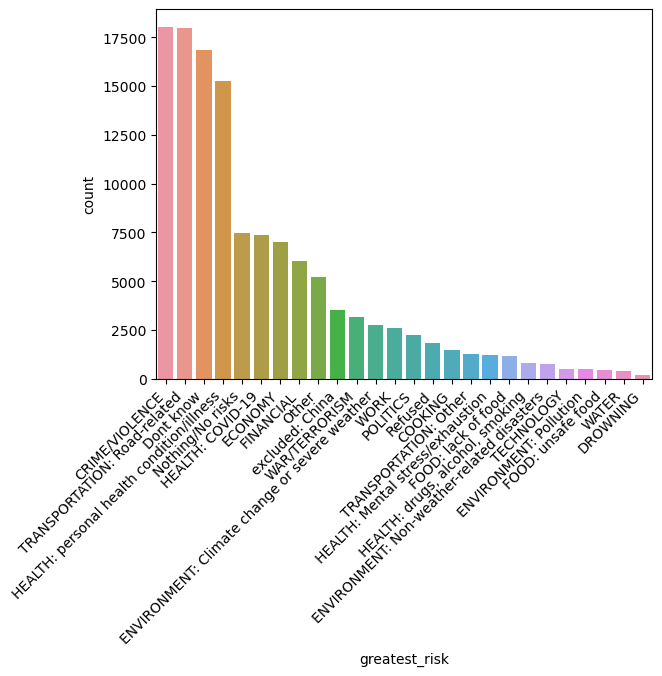

In [207]:
sns.barplot(x='greatest_risk', y= 'count', data=greatest_risk)
plt.xticks(rotation=45, ha='right')